In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Графики в SVG формате четче
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
df = pd.read_csv("Downloads/data_kr_kz.csv")

C:\Users\Досжан\AppData\Local\Temp\ipykernel_15644\3223164167.py:9: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Downloads/data_kr_kz.csv")


In [2]:
# df['builder'].notna().sum()
# answer is 0, so it is useless column
df.drop('builder', axis = 1, inplace = True)

In [3]:
df = df.rename(columns={'floor1' : 'current_floor', 'floor2' : 'max_floor'})

In [4]:
numerical = df.describe().columns
numerical = list(
    set(numerical) 
    - set(['latitude, longtitude'])
)

In [5]:
null_sum = df.isnull().sum().sort_values(ascending = False)
null_percent = round(df.isnull().sum().sort_values(ascending = False) / df.shape[0], 2)
pd.concat([null_sum, null_percent], axis = 1)

,0,1
ceiling_height,488750,0.60
residental_complex,478463,0.59
condition,126794,0.16
type_of_building,78290,0.10
region,29877,0.04
max_floor,29288,0.04
longitude,24810,0.03
latitude,24810,0.03
current_floor,20649,0.03
views,2142,0.00


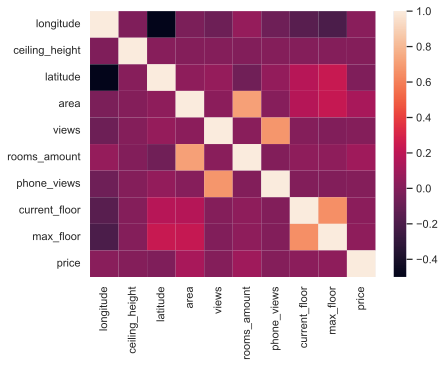

In [6]:
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix, vmin=-0.5, vmax=1);

<AxesSubplot:xlabel='condition'>

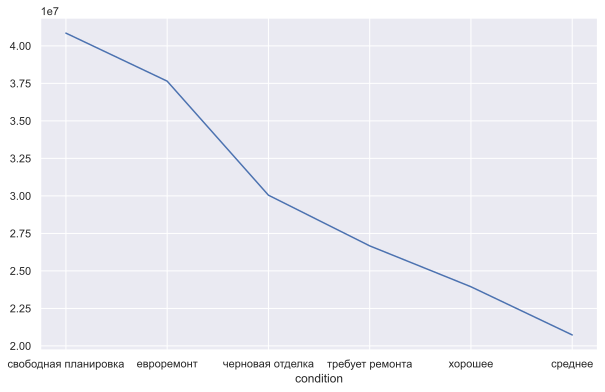

In [7]:
# 1 В зависимости от condition какая стоимость у квартир?
df.head()
df.groupby(['condition'])['price'].mean().sort_values(ascending=False).plot(figsize = (10, 6))

<AxesSubplot:xlabel='ceiling_height'>

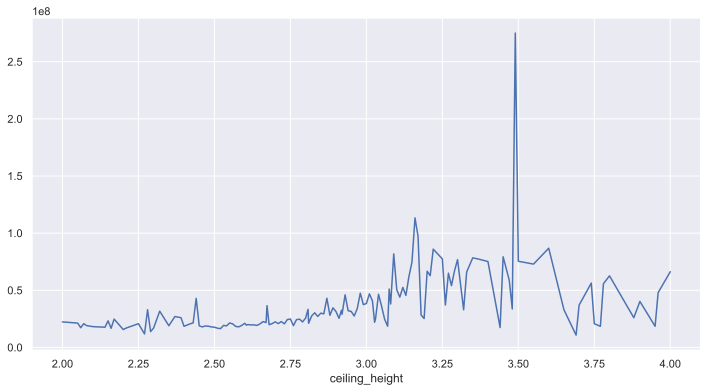

In [8]:
# 2. В зависимости от высоты потолка какая стоимость у квартир?
between_two_four = df[(df['ceiling_height'] >= 2) & (df['ceiling_height'] <= 4)]
others = df[(df['ceiling_height'] > 4) & (df['ceiling_height'] < 2)]
between_two_four.groupby(['ceiling_height'])['price'].mean().plot(figsize=(12, 6))

<AxesSubplot:xlabel='year'>

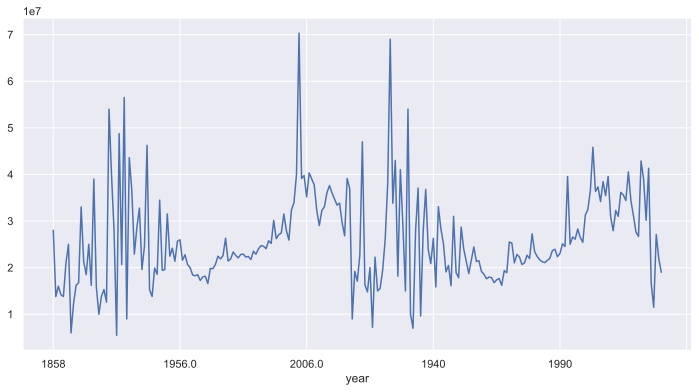

In [9]:
# 3. В зависимости от года постройки какие состояния у квартир и их цены?
df.groupby(['year'])['price'].mean().plot(figsize = (12, 6))

In [10]:
# 4. Типы здания в зависимости от района?
df.groupby(['region']).apply('type_of_building')
df['region'].unique()

array(['Есиль р-н', 'р-н Байконур', 'Алмалинский р-н', 'Сарыарка р-н',
       'Медеуский р-н', 'Жетысуский р-н', 'Бостандыкский р-н',
       'Алматы р-н', 'Ауэзовский р-н', 'Наурызбайский р-н', nan,
       'Алатауский р-н', 'Турксибский р-н', 'Аль-Фарабийский р-н',
       'Енбекшинский р-н', 'Каратауский р-н', 'Абайский р-н',
       'Новый город', 'Алматинская обл.', 'Сарыаркинский р-н',
       'Северо-Казахстанская обл.', 'Карагандинская обл.'], dtype=object)

In [11]:
# 5. В зависимости от этажей какие цены на квартиры?
# сначала я сделал анализ на этажи выше 25, потому что основная масса данных заканчивается примерно на 25 этаже (788'928), 
# а больше 25 этажа всего 831 записей
df.groupby(['current_floor'])['price'].mean()
less_25 = df[df['current_floor'] <= 25]
between_25_50 = df[(df['current_floor'] <= 50) & (df['current_floor'] > 25)]
between_50_75 = df[(df['current_floor'] <= 75) & (df['current_floor'] > 50)]
between_75_100 = df[(df['current_floor'] <= 100) & (df['current_floor'] > 75)]
between_100_125 = df[(df['current_floor'] <= 125) & (df['current_floor'] > 100)]
between_125_150 = df[(df['current_floor'] <= 150) & (df['current_floor'] > 125)]
above_150 = df[df['current_floor'] > 150]

In [12]:
# нашел среднее значение для каждого интервала
between_25_50_m = between_25_50['price'].mean()
between_50_75_m = between_50_75['price'].mean()
between_75_100_m = between_75_100['price'].mean()
between_100_125_m = between_100_125['price'].mean()
between_125_150_m = between_125_150['price'].mean()
above_150_m = above_150['price'].mean()

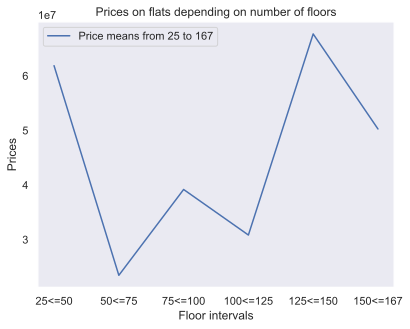

In [13]:
# сделал график
floor_intervals = ["25<=50", "50<=75", "75<=100", "100<=125", "125<=150", "150<=167"]
means = [between_25_50_m, between_50_75_m, between_75_100_m, between_100_125_m, between_125_150_m, above_150_m]

plt.plot(floor_intervals, means, label='Price means from 25 to 167')
plt.title('Prices on flats depending on number of floors')
plt.xlabel('Floor intervals')
plt.ylabel('Prices')
plt.grid()
plt.legend()

In [14]:
less_25.groupby(['current_floor'])['price'].mean()

current_floor
1.0     2.577530e+07
2.0     2.753731e+07
3.0     2.822774e+07
4.0     2.720682e+07
5.0     2.756204e+07
6.0     3.140784e+07
7.0     3.190240e+07
8.0     3.105335e+07
9.0     2.907695e+07
10.0    3.149910e+07
11.0    3.277992e+07
12.0    3.399665e+07
13.0    3.428734e+07
14.0    3.828069e+07
15.0    3.764714e+07
16.0    3.574846e+07
17.0    3.524710e+07
18.0    4.506067e+07
19.0    4.015089e+07
20.0    4.969684e+07
21.0    4.657451e+07
22.0    3.848890e+07
23.0    3.569692e+07
24.0    4.796227e+07
25.0    5.857464e+07
Name: price, dtype: float64

<AxesSubplot:xlabel='current_floor'>

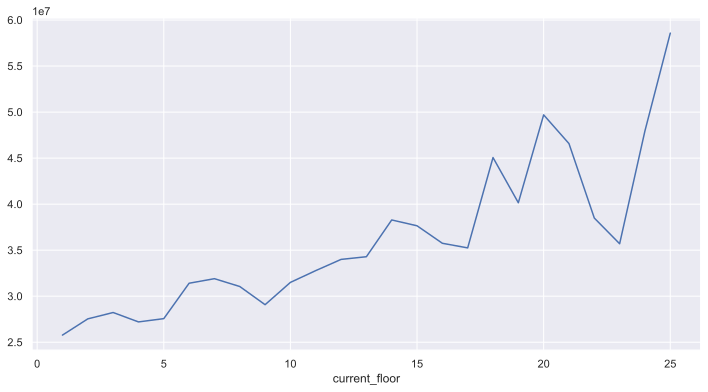

In [15]:
less_25.groupby(['current_floor'])['price'].mean().plot(figsize=(12, 6))

In [16]:
# 6. В зависимости от этажей какие квартиры более привлекательные? (views и phone_views, date_of_publication)
# Использую те же переменные и сейчас рассматриваю только этажи с 0 до 25
# отсортировал всё с конца, то есть более прилекательными считаются те которые позже опубликованы, но имеют больше просмотров
s = less_25[['views', 'phone_views', 'date_of_publication', 'current_floor']].sort_values(
by = ['views', 'phone_views', 'date_of_publication'], ascending=False)

# затем подсчитали этажи первых тысячи и узнали что нижние этажи более привлекательны, возможно потому что в Казахстане 
# больше малоэтажек чем многоэтажек
s['current_floor'].iloc[:1000].value_counts()

2.0     201
1.0     153
3.0     122
5.0     118
4.0      93
6.0      81
10.0     39
7.0      35
9.0      32
8.0      29
12.0     20
13.0     15
11.0     12
16.0      8
22.0      8
17.0      7
15.0      6
21.0      4
19.0      4
20.0      3
18.0      3
23.0      3
25.0      2
14.0      2
Name: current_floor, dtype: int64

In [17]:
# 7. По районам более дешевые квартиры набирают больше views и phone_views, болшее дорогиее менее привлекательные
# использую метод с прошлой задачи

# первый вариант
sorted_by_region_views = df[['views', 'phone_views', 'region', 'price']].sort_values(
by = ['views', 'phone_views', 'price'], ascending=False)

In [18]:
# подсчитали районы в первых тысячах (самых просматриваемых)
# я поставил порог дорогих и не дорогих квартир 40 миллионое
sorted_by_region_views[:1000].value_counts(df['price'] < 40_000_000)
# оказалось больше просматриваемых записей с дешевой ценой 

price
True     857
False    143
dtype: int64

In [19]:
# Для второго варианта я созранил цену за квадратный метр и он более правильный, 
# порог поставил 450_000 за квадратный метр
df['price_per_square'] = round(df['price'] / df['area'])

In [20]:
a = df.groupby(['region'])[['price_per_square', 'views']].mean()
# [df['price_per_square'] < 450000].sort_values(by=['views', 'phone_views'], ascending=False)
a = a.sort_values(ascending=False, by=['views', 'price_per_square'])

a[a['price_per_square'] > 450000].count()
# дорогие просматриваемые квартиры

price_per_square    3
views               3
dtype: int64

In [21]:
a[a['price_per_square'] < 450000].count()
# дешевые просматриваемые квартиры, 
# вывод: теория верна

price_per_square    18
views               18
dtype: int64

In [22]:
# 8. date_of_publication в какое время года дороже, а когда дешевле?

# сначала перевел колонку в дэйттайм формат
df['date_of_publication'] = pd.to_datetime(df['date_of_publication'], format='%Y-%m-%d')

In [23]:
winter = [12, 1, 2]
spring = [3, 4, 5]
summer = [6, 7, 8]
autumn = [9, 10, 11]
winter_price_mean = df[df['date_of_publication'].dt.month.isin(winter)]['price_per_square'].mean()
spring_price_mean = df[df['date_of_publication'].dt.month.isin(spring)]['price_per_square'].mean()
summer_price_mean = df[df['date_of_publication'].dt.month.isin(summer)]['price_per_square'].mean()
autumn_price_mean = df[df['date_of_publication'].dt.month.isin(autumn)]['price_per_square'].mean()
print("winter: ", round(winter_price_mean), "\nspring: ", round(spring_price_mean), "\nsummer: ", round(summer_price_mean), 
      "\nautumn: ", round(autumn_price_mean))
# от дорогих времен года к дешевым: зима, осень, лето, весна 

winter:  433547 
spring:  398355 
summer:  414699 
autumn:  425491


In [146]:
# 9. У BI дорогие квартиры? В зависимости от класса как меняется?
dev = pd.read_csv("Downloads/family_Zhk_Developer_Class.csv")

,Unnamed: 0,ObjectName,family_zhk,developer,Class
0,12,7Я,7Я,BI,комфорт
1,13,Absolute,Absolute,ИК Каражат,Бизнес
2,14,Adal,ADAL,BI,комфорт
3,15,ADAL-2,ADAL,BI,Комфорт
4,16,ADAL-3,ADAL,BI,Комфорт
...,...,...,...,...,...
227,714,SezimQala-8(Монолит),Sezim Qala,Nova City,стандарт
228,715,SezimQala-6-1(КПД),Sezim Qala,Nova City,стандарт
229,716,NovaCityнаТуране-2-2(Монолит),Nova City на Туране,Nova City,стандарт
230,717,NovaCityнаТуране-2-1(Монолит),Nova City на Туране,Nova City,стандарт


In [61]:
res_complex_not_null = df[df['residental_complex'].notna()]
s = pd.merge(res_complex_not_null, dev, left_on="residental_complex", right_on="ObjectName", how='inner')
round(s.groupby(['developer'])['price_per_square'].mean().sort_values(ascending=False)[:10])
# BI group седьмой из дорогих по средней цене за квадратный метр застройщиков

developer
Асем Кала             588331.0
Султан НС             529658.0
Mabex Trade LTD       514308.0
Sembol Investment     491108.0
Property Invest       479752.0
Астана СтройИнвест    473967.0
BI                    467990.0
Керуен Групп          461564.0
АстанаКазСтрой        459890.0
Galamat Group         438831.0
Name: price_per_square, dtype: float64

In [131]:
# s['developer'].value_counts()[:5], так я нашел 5 застройщиков с наибольшим количеством записей
five = ['BI', 'BAZIS-А', 'G-Park', 'Альянсстройинвест', 'Дива Строй']
# у этих пяти застройщиках только классы Комфорт и комфорт были у каждого
s1 = s[(s['developer'].isin(five)) & (s['Class'].isin(["Комфорт", "комфорт"]))]
s2 = s1.groupby(['developer', 'Class'])['price_per_square'].mean().sort_values(ascending=False)
s2

developer          Class  
BI                 комфорт    480095.390907
                   Комфорт    427610.917135
G-Park             комфорт    400239.897160
BAZIS-А            Комфорт    388545.944591
Дива Строй         Комфорт    352190.011299
Альянсстройинвест  Комфорт    343910.586451
G-Park             Комфорт    333358.138057
Name: price_per_square, dtype: float64

<AxesSubplot:xlabel='developer,Class'>

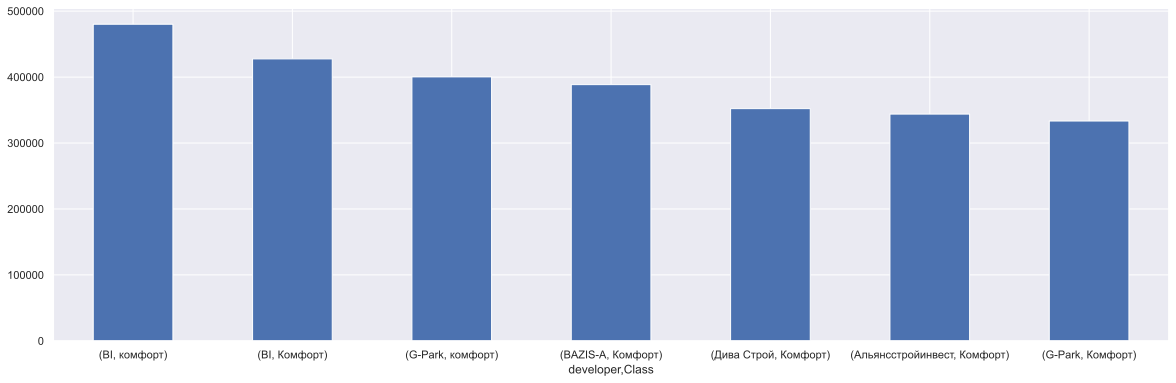

In [133]:
s2.plot(kind='bar', figsize =(20, 6), rot=0)

In [156]:
# 10. По очередям меняется ли цена у квартир?
round(s.groupby(['family_zhk'])['price_per_square'].mean())

family_zhk
7Я            410811.0
ADAL          382823.0
AQ-DIDAR      388546.0
Absolute      424392.0
Alan          444529.0
                ...   
Экодом        298546.0
Эльбрус       250908.0
Эмират        301787.0
Юго-Восток    296311.0
Юпитер        267204.0
Name: price_per_square, Length: 118, dtype: float64

In [ ]:
round(s.groupby(['ObjectName'])['price_per_square'].mean())